# DETECTION SPEECH PATTERN OF PEOPLE WITH  PARKINSONS DISEASE.

According to Mayo Clinic, Parkinson's disease is a progressive nervous system disorder that affects movement. Symptoms start gradually, sometimes with a barely noticeable tremor in just one hand. Tremors are typical, but the disorder also causes stiffness or slowing of movement. In the early stages of Parkinson's disease, your face may show little or no expression. Your arms may not swing when you walk. Your speech may become soft or slurred. Parkinson's disease symptoms worsen as your condition progresses over time.
The symptoms of Parkinson's disease may include slowed movements, tremors, rigid muscles, impaired posture, and speech changes. This article will focus on how speech changes can be early detection of Parkinson's disease.
This dataset is composed of a range of biomedical voice measurements from 31 people, 23 with Parkinson's disease (PD). Each column in the table is a particular voice measure, and each row corresponds to one of 195 voice recordings from these individuals ("name" column).
 
The main aim of the data is to classify patients according to the "status" column which is set to 0 for healthy and 1 for PD.

The data is in ASCII CSV format. The rows of the CSV file contain an 
instance corresponding to one voice recording. There are around six 
recordings per patient,
The measure of the fundamental frequency.
The measure of variation in fundamental frequency
The measure of noise to tonal components in the voice,
The nonlinear dynamic complexity measure.
The measure of the signal fractal scaling exponent
The nonlinear measures of fundamental frequency variation.
From the Parkinsons information data source, we know the columns of the dataset correspond to the following voice measure recordings
Matrix column entries (attributes):
name - ASCII subject name and recording number
1. MDVP:Fo(Hz) - Average vocal fundamental frequency
   MDVP:Fhi(Hz) - Maximum vocal fundamental frequency
   MDVP:Flo(Hz) - Minimum vocal fundamental frequency

2. MDVP:Jitter(%),MDVP:Jitter(Abs), MDVP:RAP, MDVP:PPQ, Jitter:DDP - Several measures of variation in fundamental frequency

3. MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA - Several measures of variation in amplitude

4. NHR, HNR - Two measures of the ratio of noise to tonal components in the voice

5. Status - Health status of the subject (one) - Parkinson's, (zero) - healthy

4. RPDE,D2 - Two nonlinear dynamical complexity measures

5. DFA - Signal fractal scaling exponent

6. spread1,spread2,PPE - Three nonlinear measures of fundamental frequency variation 


In [433]:
# import the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

#### READING CSV FILE
Accessing the five rows of the data, the data has a name column that shows the name codes of patients, a status column, and 22 other columns that represents the various voice measurements. The data has 195 rows and 24 columns.

In [434]:
data= pd.read_csv('parkinsons.data')
print('The data has {} rows and {} columns'.format(str(data.shape[0]),str(data.shape[1])))
data.head()



The data has 195 rows and 24 columns


,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


#### EXPLORATORY DATA ANALYSIS

The information from the data shows the voice recording measurement columns data types are float, the status column is an integer and the name column is an object. The data has no missing values.

In [435]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [436]:
data.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


In [437]:
data.columns.tolist()

['name',
 'MDVP:Fo(Hz)',
 'MDVP:Fhi(Hz)',
 'MDVP:Flo(Hz)',
 'MDVP:Jitter(%)',
 'MDVP:Jitter(Abs)',
 'MDVP:RAP',
 'MDVP:PPQ',
 'Jitter:DDP',
 'MDVP:Shimmer',
 'MDVP:Shimmer(dB)',
 'Shimmer:APQ3',
 'Shimmer:APQ5',
 'MDVP:APQ',
 'Shimmer:DDA',
 'NHR',
 'HNR',
 'status',
 'RPDE',
 'DFA',
 'spread1',
 'spread2',
 'D2',
 'PPE']

#### UNIVARIATE DATA ANALYSIS


##### STATUS COLUMN
The status column shows there are 48 healthy patients and 147 PD patients.

1    147
0     48
Name: status, dtype: int64


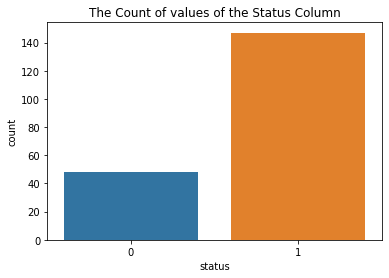

In [438]:
# status column value counts
print(data.status.value_counts())
sns.countplot(x='status',data=data)
plt.title('The Count of values of the Status Column')
plt.show()


###### Displaying the distribution of all the various measurements of voice columns. 
From the visualization, we can deduce that most of the columns are right-skewed. We can measure the skewness of the distribution precisely. The HNR column is the highest among the left-skewed of -0.5  and NHR is highly skewed to the right by 4.2.

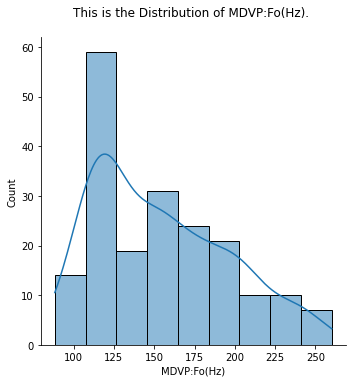

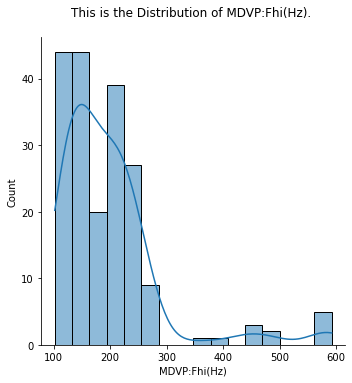

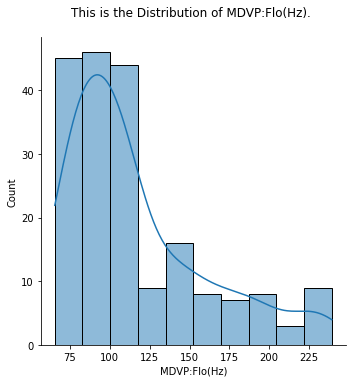

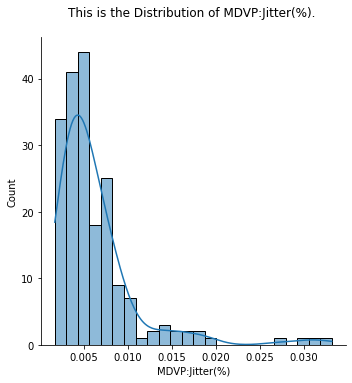

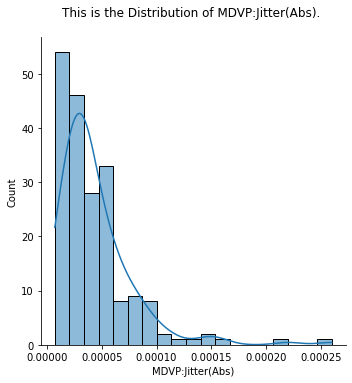

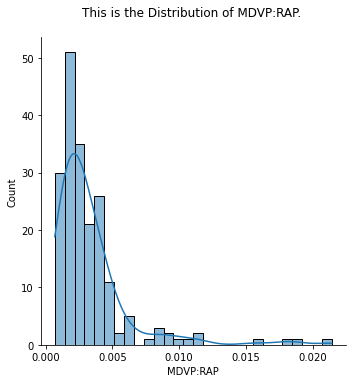

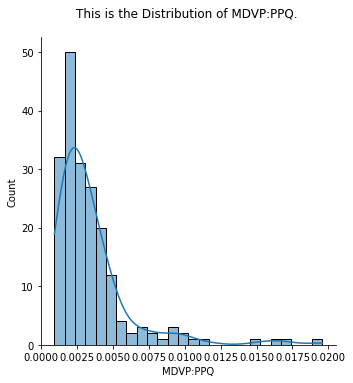

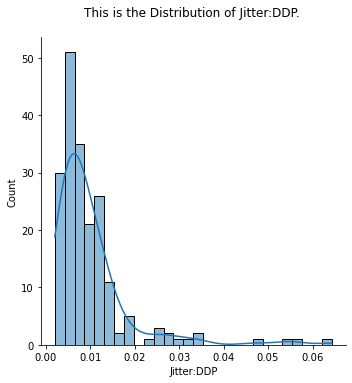

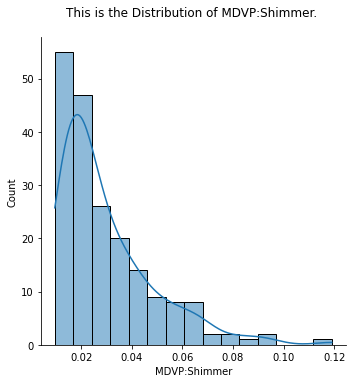

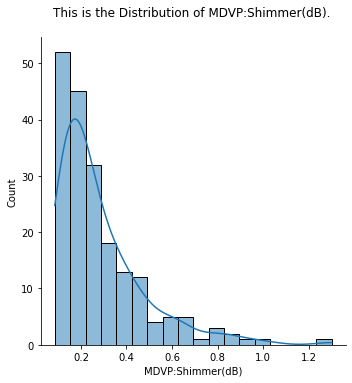

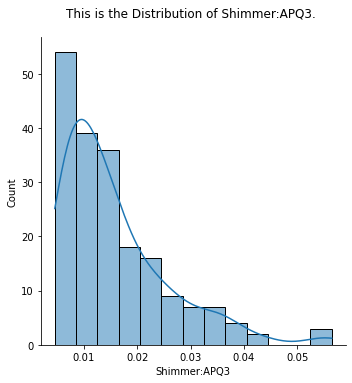

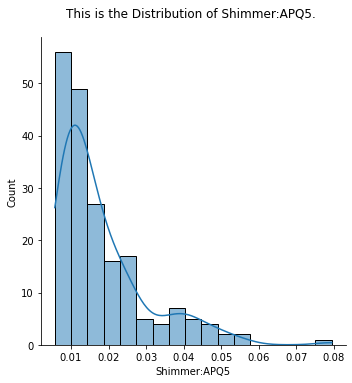

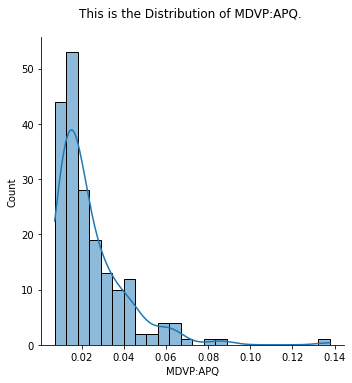

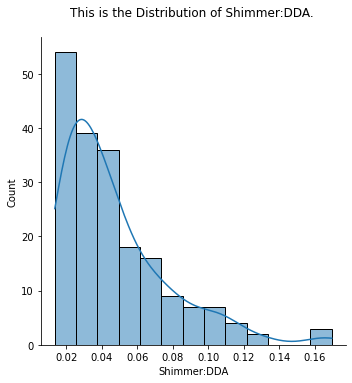

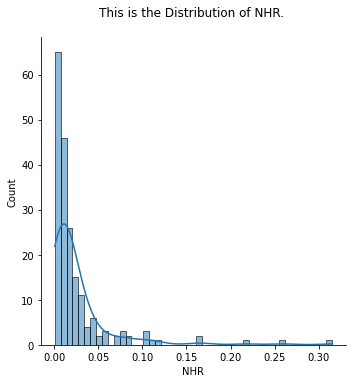

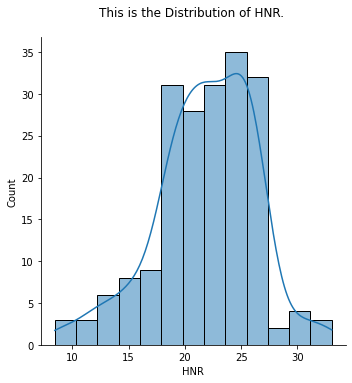

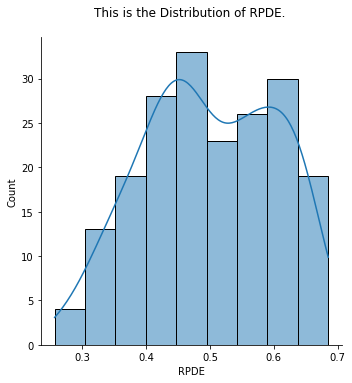

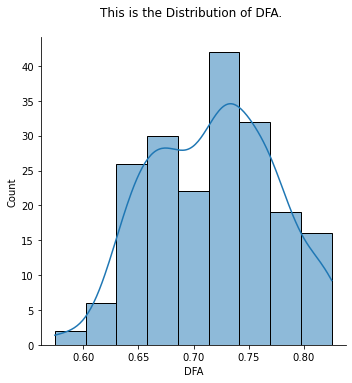

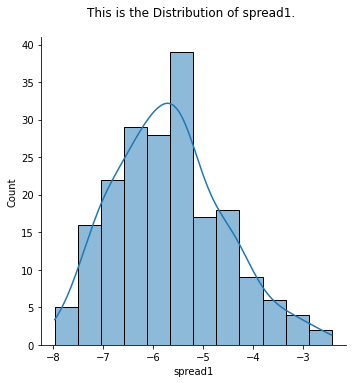

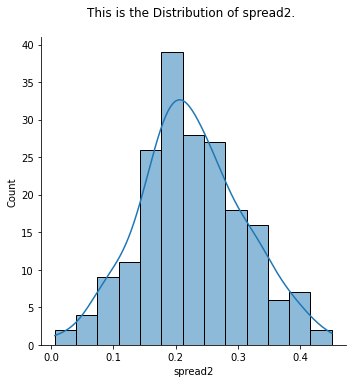

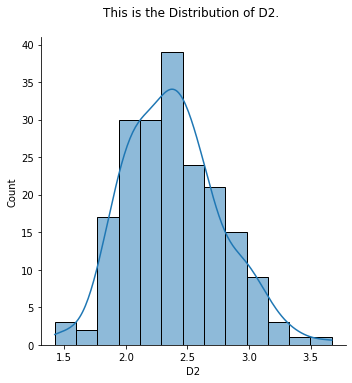

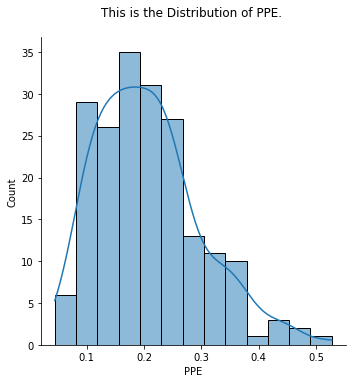

In [439]:
# distribution of feature variables
for n, col in enumerate(data.columns):
    if (data[col].dtype.name == 'float64'):
        sns.displot(data[col],kde=True)
        plt.title("This is the Distribution of {}. \n".format(col))
        plt.show()

In [440]:
data.skew()

MDVP:Fo(Hz)         0.591737
MDVP:Fhi(Hz)        2.542146
MDVP:Flo(Hz)        1.217350
MDVP:Jitter(%)      3.084946
MDVP:Jitter(Abs)    2.649071
MDVP:RAP            3.360708
MDVP:PPQ            3.073892
Jitter:DDP          3.362058
MDVP:Shimmer        1.666480
MDVP:Shimmer(dB)    1.999389
Shimmer:APQ3        1.580576
Shimmer:APQ5        1.798697
MDVP:APQ            2.618047
Shimmer:DDA         1.580618
NHR                 4.220709
HNR                -0.514317
status             -1.187727
RPDE               -0.143402
DFA                -0.033214
spread1             0.432139
spread2             0.144430
D2                  0.430384
PPE                 0.797491
dtype: float64

#### Correlation Between the numeric columns
The higher the correlation between two columns shows how closely related they are. The heatmap() function of the Seaborn library visualizes the correlation matrix of data for feature selection. Each data value represents a color. The color of the matrix is dependent on the value. The lighter color indicates that the correlation is low and the darker color is for high correlation.


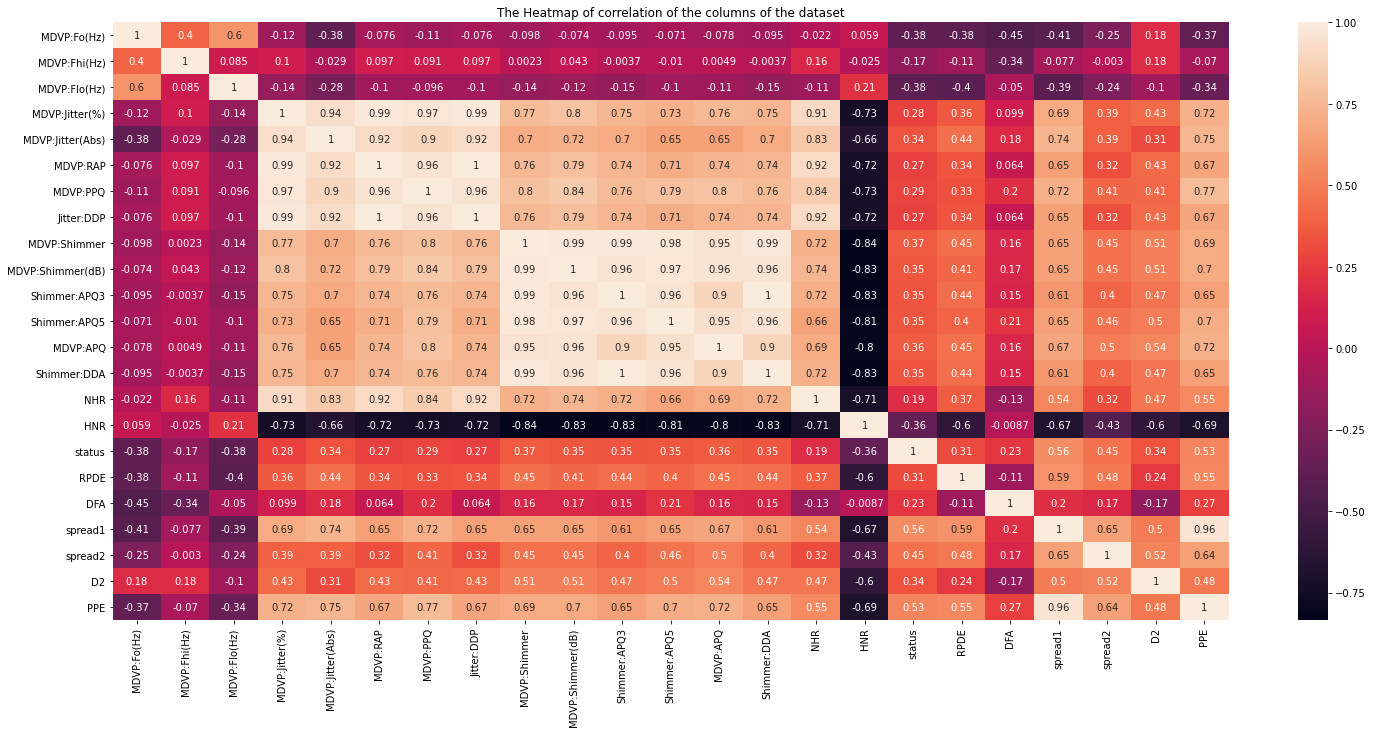

In [441]:
fig,ax=plt.subplots(figsize=(25,11))
sns.heatmap(data.corr(),annot=True)
plt.title("The Heatmap of correlation of the columns of the dataset")
plt.show()

### Removing Highly Correlated Features Before training Our model
Highly correlated features bring the same information to the model. Since two highly correlated features mean one is closely associated with the other, having all two features will cause a significant problem when fitting your model. Data having non-correlated features have many benefits. Such as:
1. Learning of Algorithm will be faster
2. Interpretability will be high
3. Bias will be less
Therefore we need to remove features that have a high correlation with one another. We set a threshold for high correlation at 0.95. Then filter out the columns with correlations above the threshold. I picked up the code for filtering out highly correlated features on Stack Overflow.
Before that, we split our dataset into labels and features. The labels are the status column and the features are the various voice recording measurement.

In [442]:
labels= data["status"]
features= data.drop(["name", "status"], axis=1)


In [443]:
# Get correlation matrix 
corr_matrix = features.corr().abs()

# select upper traingle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
# Find features with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]

# Drop features 
features.drop(to_drop, axis=1, inplace=True)
features


,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:Shimmer,NHR,HNR,RPDE,DFA,spread1,spread2,D2
0,119.992,157.302,74.997,0.00784,0.00007,0.04374,0.02211,21.033,0.414783,0.815285,-4.813031,0.266482,2.301442
1,122.400,148.650,113.819,0.00968,0.00008,0.06134,0.01929,19.085,0.458359,0.819521,-4.075192,0.335590,2.486855
2,116.682,131.111,111.555,0.01050,0.00009,0.05233,0.01309,20.651,0.429895,0.825288,-4.443179,0.311173,2.342259
3,116.676,137.871,111.366,0.00997,0.00009,0.05492,0.01353,20.644,0.434969,0.819235,-4.117501,0.334147,2.405554
4,116.014,141.781,110.655,0.01284,0.00011,0.06425,0.01767,19.649,0.417356,0.823484,-3.747787,0.234513,2.332180
...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,174.188,230.978,94.261,0.00459,0.00003,0.04087,0.02764,19.517,0.448439,0.657899,-6.538586,0.121952,2.657476
191,209.516,253.017,89.488,0.00564,0.00003,0.02751,0.01810,19.147,0.431674,0.683244,-6.195325,0.129303,2.784312
192,174.688,240.005,74.287,0.01360,0.00008,0.02308,0.10715,17.883,0.407567,0.655683,-6.787197,0.158453,2.679772
193,198.764,396.961,74.904,0.00740,0.00004,0.02296,0.07223,19.020,0.451221,0.643956,-6.744577,0.207454,2.138608


### 1. The maximum vocal fundamental frequency of healthy patients and PD patients.
Plotting the values of maximum vocal fundamental frequency against the individual patients which is the index. This shows most of the data points lying within 100 to 300 for both healthy and PD patients. 

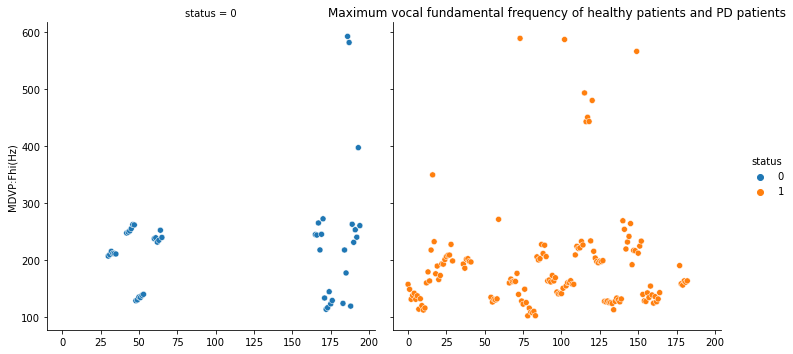

In [444]:
sns.relplot(x= data.index, y='MDVP:Fhi(Hz)', hue='status', col='status',data=data)
plt.title('Maximum vocal fundamental frequency of healthy patients and PD patients')
plt.show()

### 2. The ratio of noise to tonal components in the voice of healthy patients and PD patients.
Using the NHR ratio to tonal components measure, we notice that most of the data points for both healthy and PD patients range from 0 to 0.05

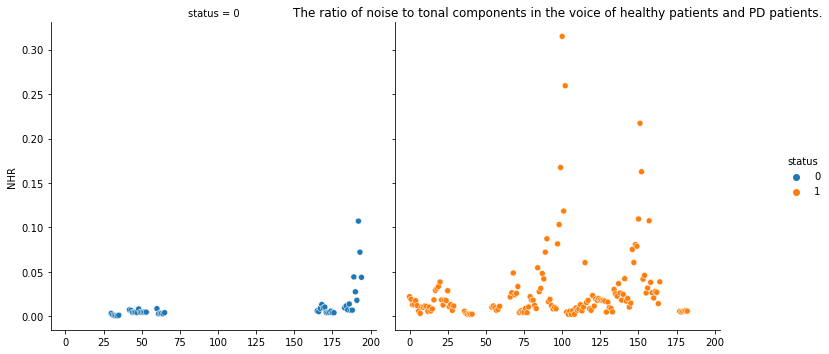

In [445]:
sns.relplot(x= data.index, y='NHR', hue='status', col='status',data=data)
plt.title('The ratio of noise to tonal components in the voice of healthy patients and PD patients.')
plt.show()

### 3. Measure of variation in amplitude in healthy patients and PD patients
The diagram shows the variation in amplitude of healthy patients ranges from 0.01 to 0.03 and the PD patients range from 0.01 to 0.06.

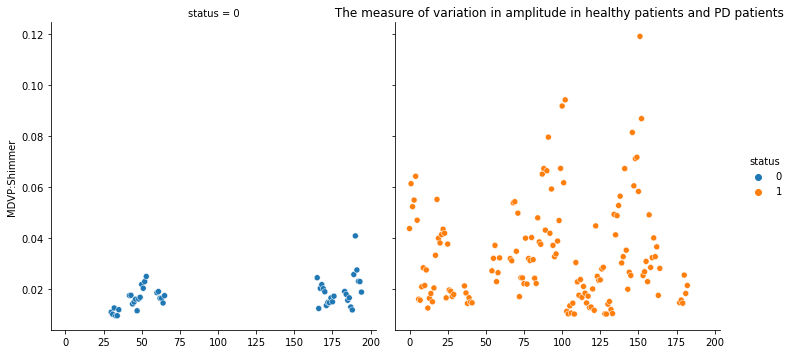

In [446]:
sns.relplot(x= data.index, y='MDVP:Shimmer', hue='status', col='status',data=data)
plt.title(' The measure of variation in amplitude in healthy patients and PD patients')
plt.show()

## Splitting and Preparing data for modeling
Since we have categorized our data into labels and features above, we instantiate the Standard Scaler and fit and transform our features dataset. Split the scaled features and labels into 80% training and 20% testing dataset. Using the XGBoost Classifier from the xgboost model, we fit our training data.

In [447]:
scaler=  StandardScaler()

In [448]:
X= scaler.fit_transform(features)

In [449]:
X_train,X_test,y_train,y_test= train_test_split(X,labels,test_size=0.2,random_state=111)


In [450]:
model = XGBClassifier()
model

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, gamma=None,
              gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, predictor=None, random_state=None,
              reg_alpha=None, reg_lambda=None, ...)

In [451]:
model.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

### Model Prediction and Evaluation
Perform prediction using the model by testing it on new data (X_test data). Using accuracy score metrics from Sklearn to test the accuracy of our model. The accuracy of our model is 97%

In [452]:
y_pred = model.predict(X_test)

In [453]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.9743589743589743